# Eksploracyjna analiza danych
  *autor: Piotr Dłubak*
- Poznań,  maj 2023  -
  ver: 1.03 - wersja developerska

#### Cel analizy


1. Badana populacja: klienci sklepów spożywczych
2. Rodzaj badania: ankieta on-line dostępna dla wszystkich użytkowników na terenie Polski
3. Metoda analizy: EDA ("Exploratory Data Analysis") - analiza deskrypcyjna

Analiza deskrypcyjna to proces badania, opisywania i interpretacji danych w celu uzyskania wglądu i zrozumienia ich cech, wzorców i związków. Jest to technika często stosowana w dziedzinach naukowych, badań społecznych, statystyce, lingwistyce i wielu innych dziedzinach.

Głównym celem analizy deskrypcyjnej jest opisanie i podsumowanie danych w sposób, który ujawnia istotne informacje. Może obejmować takie elementy jak obliczanie średnich, median, odchyleń standardowych, minimalnych i maksymalnych wartości, oraz prezentowanie danych w postaci tabel, wykresów lub grafów.

Analiza deskrypcyjna umożliwia identyfikację kluczowych cech, trendów, anomalii i relacji w danych. Może również pomóc w odkrywaniu wzorców, porównywaniu grup lub kategorii danych oraz wyprowadzaniu wniosków na podstawie zebranych informacji.

Głównym celem EDA jest zapewnienie wglądu w dane jeszcze przed sformułowaniem jakichkolwiek założeń. Pomaga identyfikować oczywiste błędy, lepiej pojmować wzorce występujące w obrębie danych, wykrywać wartości odstające i anomalie, a także odnajdywać interesujące relacje między zmiennymi.

Po przeprowadzeniu analizy EDA i uzyskaniu istotnych spostrzeżeń wciąż można wykorzystać tę metodę do bardziej zaawansowanej analizy danych lub modelowania, w tym na potrzeby uczenia maszynowego.

Wyniki przeprowadzonej analizy pokazały, że dla współczesnego
konsumenta decyzja o zakupie produktu nie jest motywowana wyłącznie
chęcią zaspokojenia określonych potrzeb, ale w znacznym stopniu determinuje ją
potrzeba demonstracji przekonań, statusu społeczno-ekonomicznego i stylu życia.
Nowoczesny model konsumpcji niesie określone konsekwencje dla praktyki działań
marketingowych.


Badanie ankietowe dotyczyło postaw i zachowań respondentów w tracie dokonywania
zakupów produktów żywnościowych. W tym celu został skonstruowany kwestionariusz ankiety


**Cechy, takie jak wiek, płeć, wykształcenie, preferowany typ sklepu, dochody netto, preferowana marka sklepu, preferowany towar, preferowany rodzaj promocji oraz czynnik zakupowy, mogą wpływać na wysokość zakupów żywnościowych. **

### Wymagania dotyczące danych: Zdefiniowenie zakresu analizy (zmienne, obserwacje, zakresy dziedzinowe)
   

| Nazwa zmiennej             | Wymagany typ danych                           | Wartości referencyjne                                   | Czy puste?    | Powtórzenia? |
|---------------------------|----------------------------------------------|---------------------------------------------------------|----------------|--------------|
| nr_respondenta            | text, liczba                                 | dowolne                                                 | niedozwolone  | niezozwolone |
| płeć                      | text                                         | "mężczyzna", "kobieta"                                 | niedozwolone  | dozwolone    |
| wykształcenie             | text                                         | 'podstawowe', 'zawodowe','średnie', 'wyższe'            | niedozwolone   | dozwolone    |
| wiek                      | liczba                                       | 13-105                                                  | niedozwolone   | dozwolone    |
| liczba osób w rodzinie    | liczba                                       | (1-20)                                                  | niedozwolone   | dozwolone    |
| preferowany typ sklepu    | text                                         | 'bazarek', 'osiedlowy', 'supermarket', 'galeria'        | niedozwolone  | dozwolone    |
| preferowana marka sklepu  | text                                         | dowolne                                                 | niedozwolone   | dozwolone    |
| preferowany towar         | text                                         | dowolne                                                 | niedozwolone   | dozwolone    |
| czynnik zakupowy          | text                                         | dowolne                                                 |niedozwolone   | dozwolone    |
| zakupy ile razy w mc      | text                                         | dowolne                                                 |niedozwolone  | dozwolone    |
| rodzaj promocji           | text                                         | 'sugestia kasjera', 'gazetka ', 'reklama RTV', 'sms ', 'e-mail ', 'karta ', 'aplikacja ', 'nie korzystam' | niezozwolone  | dozwolone    |\n
| miasto                    | text                                         | dowolne                                                 | niedozwolone | dozwolone    |
| dochody                   | liczba                                       | >0                                                      |niedozwolone  | dozwolone    |
| wydatki                   | liczba                                       | >0                                                      |niedozwolone  | dozwolone    |


#### Załadowanie bibliotek

In [896]:
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# from tabulate import tabulate
# from IPython.display import HTML
import statsmodels.api as sm
# from statsmodels.graphics.mosaicplot import mosaic
# import itertools
import random
# from scipy.stats import shapiro, normaltest, skew, kurtosis, iqr
# from scipy.stats import jarque_bera
from scipy.stats import zscore
# from sklearn.impute import KNNImputer
# from sklearn.cluster import KMeans
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.preprocessing import PowerTransformer
import re
import math

warnings.filterwarnings("ignore")

# I. Wstępne przetwarzanie

/bin/python' requires the ipykernel package.


## 1. Przygotowanie danych

### 1.1. Pozyskanie danych

* Dane ankietowe do analizy pozyskano od klientow sklepów spożywczych w formie ankiety on-line udostępnionej dla wszystkich użytkowników na terenie Polski.
* Informacje o danych demograficznych pozyskano z lokalnych baz danych organizatora badań.
* Pozyskane dane zostały przekazane do organizatora celem zaladownia danych do plików.
* W ten sposób do analizy otrzymano komplet 4 plików:
  
|   |      Plik            |
|---|-----------------|
| 1 | 'ankieta_01a.xlsx' |
| 2 | 'ankieta_01b.xlsx' |
| 3 | 'ankieta_02.csv'   |
| 4 | 'miasta.json'   |


* pliki te stanowią źródla informacji dla prowadzonej analizy EDA.

### 1.2. Pobranie i załadowanie danych

In [897]:

ankieta_01a = pd.read_excel('ankieta_01a.xlsx')
ankieta_01b = pd.read_excel('ankieta_01b.xlsx')
ankieta_02 = pd.read_csv('ankieta_02.csv', skiprows=1, skipfooter=1, delimiter=';',engine='python')
miasta = pd.read_json('miasta.json')

### 1.3. Wyświetlenie pierwszych wierszy tabel

In [898]:
lista_plików = [ankieta_01a, ankieta_01b, ankieta_02, miasta]

for plik in lista_plików:
    print()
    display(plik.head(3))

,nr_respondenta,kod_miasta,wiek|liczba osób w rodzinie,m_wykształcenie,k_wykształcenie,PREFEROWANY TYP SKLEPU,preferowana marka sklepu,preferowanay towar,preferowany rodzaj promocji,preferowany rodzaj promocji.1,czynnik zakupowy,zakupy ile razy w mc
0,R_005,M_057,38|5,zawodowe,NaN,OSIEDLOWY,LIDL,Mięso i wędliny,gazetka,NaN,jakość,od 1 do 4
1,R_010,M_053,59|1,zawodowe,NaN,OSIEDLOWY,NETTO,Mięso i wędliny,sms,NaN,marka,od 1 do 4
2,R_036,M_074,35|1,wyższe,NaN,GALERIA,ŻABKA,Mięso i wędliny,gazetka,NaN,jakość,od 15 22


,nr_respondenta,kod_miasta,wiek|liczba osób w rodzinie,m_wykształcenie,k_wykształcenie,PREFEROWANY TYP SKLEPU,preferowana marka sklepu,preferowanay towar,preferowany rodzaj promocji,preferowany rodzaj promocji.1,czynnik zakupowy,zakupy ile razy w mc
0,R_091,M_009,53|2,NaN,wyższe,GALERIA,ALDI,Mięso i wędliny,reklama,RTV,jakość,od 15 do 22
1,R_102,M_038,66|3,NaN,wyższe,GALERIA,KAUFLAND,Mięso i wędliny,gazetka,NaN,jakość,od 5 do 10
2,R_111,M_071,53|1,NaN,wyższe,GALERIA,BIEDRONKA,Mięso i wędliny,reklama,RTV,cena,od 15 do 22


,nr_respondenta,miara,wartość
0,R_001,dochody roczne,54
1,R_001,wydatki_na_żywność_mc,750
2,R_002,dochody roczne,26


,kod_miasta,Miasto,Liczba ludności
0,M_001,Warszawa,1790658
1,M_002,Kraków,779115
2,M_003,Łódź,684113


### 1.3. Wyświetlenie informacji o tabelach

In [899]:
for plik in lista_plików:
    print('_'*70)
    print(plik.info())

______________________________________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   nr_respondenta                 62 non-null     object
 1   kod_miasta                     62 non-null     object
 2   wiek|liczba osób w rodzinie    62 non-null     object
 3   m_wykształcenie                40 non-null     object
 4   k_wykształcenie                22 non-null     object
 5   PREFEROWANY TYP SKLEPU         62 non-null     object
 6   preferowana marka sklepu       62 non-null     object
 7   preferowanay towar             62 non-null     object
 8   preferowany rodzaj promocji    62 non-null     object
 9   preferowany rodzaj promocji.1  21 non-null     object
 10  czynnik zakupowy               62 non-null     object
 11  zakupy ile razy w mc           62 non-null     object


## 2. Uporządkowanie danych

### 2.1.Określenie zasad uporządkowanego zbioru danych


Zasady Danych uporządkowanych:
1. Każda zmienna tworzy kolumnę.
2. Każda obserwacja tworzy wiersz.
3. Każdy rodzaj jednostki tworzy tabelę.

Dzięki uporządkowaniu danych:
* łatwiej skuteczniej można przekształcać, zmieniać, Modelować, Wizualizować dane. 
* Uporządkowane dane zapewniają ustandaryzowany sposób. Łączenia struktury zestawu danych, jego fizyczny układ z jego semantyką. Jego znaczeniem.
Struktura danych ramki danych składa się z wierszy i kolumn.
* Kolumny oznaczają etykiety nazwy zmiennej
* Wiersze zawierają daną. Opisywaną jednostkę obserwowaną.

Semantyka danych.
* Zbiór danych to zbiór wartości. 
* Liczby w przypadku zmiennych ilościowych.
* Ciągi znaków w przypadku zmiennych jakościowych.
* Każda wartość należy do zmiennej i obserwacji. 
* Zmienna zawiera wszystkie wartości.



parametry badania:
zmienne ilościowe:
zmienne jakościowe:





### 2.2. Identyfikacja czy posiadane dane posiadają oznaki danych nieuporządkowych tj. są niezgodne z paradygmatem "TIDY DATA"

#### 2.2.1.  Niezgodność nr 1. Duplikaty
Sprawdzenie czy w danych występują duplikaty

In [900]:

print(f"Nazwa pliku: --> ankieta_01a     duplikaty w pliku:--> {ankieta_01a.duplicated().any()}")
print(f"Nazwa pliku: --> ankieta_01b     duplikaty w pliku:--> {ankieta_01b.duplicated().any()}")
print(f"Nazwa pliku: --> ankieta_02      duplikaty w pliku:--> {ankieta_02.duplicated().any()}")
print(f"Nazwa pliku: --> miasta          duplikaty w pliku:--> {miasta.duplicated().any()}")

Nazwa pliku: --> ankieta_01a     duplikaty w pliku:--> True
Nazwa pliku: --> ankieta_01b     duplikaty w pliku:--> False
Nazwa pliku: --> ankieta_02      duplikaty w pliku:--> False
Nazwa pliku: --> miasta          duplikaty w pliku:--> False


In [901]:
display(ankieta_01a[ankieta_01a.duplicated()])

,nr_respondenta,kod_miasta,wiek|liczba osób w rodzinie,m_wykształcenie,k_wykształcenie,PREFEROWANY TYP SKLEPU,preferowana marka sklepu,preferowanay towar,preferowany rodzaj promocji,preferowany rodzaj promocji.1,czynnik zakupowy,zakupy ile razy w mc
8,R_059,M_016,26|5,NaN,średnie,SUPERMARKET,ALDI,Mięso i wędliny,sugestia,kasjera,cena,od 5 do 10
34,R_058,M_052,47|4,NaN,średnie,SUPERMARKET,ŻABKA,Produkty mleczne,gazetka,NaN,marka,od 11 do 15
50,R_057,M_054,69|2,NaN,średnie,OSIEDLOWY,LIDL,Produkty piekarnicze,gazetka,NaN,cena,od 11 do 15


In [902]:
#Usunięcie zduplikowanych danych

print(f'UWAGA: Usunięto wiersze ({sum(ankieta_01a.duplicated())}) z duplikującymi się danymi')
ankieta_01a.drop_duplicates(inplace=True)
print(f'duplikaty w pliku:--> {ankieta_01a.duplicated().any()}')

UWAGA: Usunięto wiersze (3) z duplikującymi się danymi
duplikaty w pliku:--> False


#### 2.2.2.  Niezgodność nr 2. Podzielone obserwacje pomiędzy wiele tabel

In [903]:
# dane z ankiety ankieta_01 zostały pozielona na dwa pliki:ankieta_01a i ankieta_01b

# Przed połączeniem należy sprawdzić zgodnośc tabel w zakresie kolumn

if list(ankieta_01a.columns) == list(ankieta_01a.columns):
    print("Kolumny są zgodne.")
else:
    print("Kolumny nie są zgodne.")


Kolumny są zgodne.


In [904]:
#Połącznie plików: ankieta_01a i  ankieta_01b w jeden plik
ankieta_01 = pd.concat([ankieta_01a, ankieta_01b], axis=0)
ankieta_01.head()

,nr_respondenta,kod_miasta,wiek|liczba osób w rodzinie,m_wykształcenie,k_wykształcenie,PREFEROWANY TYP SKLEPU,preferowana marka sklepu,preferowanay towar,preferowany rodzaj promocji,preferowany rodzaj promocji.1,czynnik zakupowy,zakupy ile razy w mc
0,R_005,M_057,38|5,zawodowe,NaN,OSIEDLOWY,LIDL,Mięso i wędliny,gazetka,NaN,jakość,od 1 do 4
1,R_010,M_053,59|1,zawodowe,NaN,OSIEDLOWY,NETTO,Mięso i wędliny,sms,NaN,marka,od 1 do 4
2,R_036,M_074,35|1,wyższe,NaN,GALERIA,ŻABKA,Mięso i wędliny,gazetka,NaN,jakość,od 15 22
3,R_044,M_053,58|5,NaN,podstawowe,OSIEDLOWY,BIEDRONKA,Mięso i wędliny,gazetka,NaN,marka,od 1 do 4
4,R_047,M_079,26|3,NaN,zawodowe,BAZAREK,JEŻYK,Mięso i wędliny,gazetka,NaN,cena,od 5 do 10


#### 2.2.3.  Niezgodność nr 3. Przechowywanie w rożnych wierszach jednej kolumny wartosci wielu zmiennych

In [905]:
# jednej kolumnie "miara" przechowywane są nazwy 2 różnych zmiennych a w kolumnie "wartość" wartosci odpowiadające różnym zmiennych
ankieta_02.head()

,nr_respondenta,miara,wartość
0,R_001,dochody roczne,54
1,R_001,wydatki_na_żywność_mc,750
2,R_002,dochody roczne,26
3,R_002,wydatki_na_żywność_mc,2300
4,R_003,dochody roczne,50


In [906]:
# przekształcenie tabeli
ankieta_02 = ankieta_02.set_index(['nr_respondenta', 'miara']).unstack().reset_index()
ankieta_02.head()

nr_respondenta        wartość                      
miara                dochody roczne wydatki_na_żywność_mc
0              R_001             54                   750
1              R_002             26                  2300
2              R_003             50                   430
3              R_004             45                   507
4              R_005             28                   750

#### 2.2.4.  Niezgodność nr 4. Używanie jaka nagłówków kolumn wartosci zamiast nazw zmiennych

In [907]:
# Zmienna wykształcenie i płeć zostały połączone w k=jednej kolumnie
ankieta_01[['nr_respondenta','m_wykształcenie','k_wykształcenie']].head()

,nr_respondenta,m_wykształcenie,k_wykształcenie
0,R_005,zawodowe,NaN
1,R_010,zawodowe,NaN
2,R_036,wyższe,NaN
3,R_044,NaN,podstawowe
4,R_047,NaN,zawodowe


In [908]:
t1=ankieta_01[['nr_respondenta','m_wykształcenie','k_wykształcenie']]
t1=t1.set_index('nr_respondenta').stack().reset_index()
t1.columns  = ['nr_respondenta', 'typ_wykształcenia', 'wykształcenie']
t1['typ_wykształcenia'] = t1['typ_wykształcenia'].str.replace('_wykształcenie', '')

t1 = t1.rename(columns={'typ_wykształcenia': 'płeć'})

ankieta_01 = pd.merge(ankieta_01, t1, on = 'nr_respondenta',how = 'left'	)
ankieta_01 = ankieta_01.drop(['m_wykształcenie','k_wykształcenie'], axis=1)
ankieta_01.head(2)

,nr_respondenta,kod_miasta,wiek|liczba osób w rodzinie,PREFEROWANY TYP SKLEPU,preferowana marka sklepu,preferowanay towar,preferowany rodzaj promocji,preferowany rodzaj promocji.1,czynnik zakupowy,zakupy ile razy w mc,płeć,wykształcenie
0,R_005,M_057,38|5,OSIEDLOWY,LIDL,Mięso i wędliny,gazetka,NaN,jakość,od 1 do 4,m,zawodowe
1,R_010,M_053,59|1,OSIEDLOWY,NETTO,Mięso i wędliny,sms,NaN,marka,od 1 do 4,m,zawodowe


#### 2.2.5.  Niezgodność nr 5. Podzielone wartości jednej zmiennej pomiędzy kilka kolumn

In [909]:
#Zmienna preferowany rodzaj promocji została podzielona na dwie kolumny
ankieta_01[['preferowany rodzaj promocji','preferowany rodzaj promocji.1']].head()

,preferowany rodzaj promocji,preferowany rodzaj promocji.1
0,gazetka,NaN
1,sms,NaN
2,gazetka,NaN
3,gazetka,NaN
4,gazetka,NaN


In [910]:
ankieta_01['preferowany rodzaj promocji.1']=ankieta_01['preferowany rodzaj promocji.1'].fillna('_')
ankieta_01['rodzaj promocji'] = ankieta_01['preferowany rodzaj promocji'].astype(str).str.cat(ankieta_01['preferowany rodzaj promocji.1'].astype(str), sep=' ')
ankieta_01['rodzaj promocji'] = ankieta_01['rodzaj promocji'].str.replace('_','')    # usunieto zbędne znaki_
ankieta_01= ankieta_01.drop('preferowany rodzaj promocji', axis=1) # usunięcie zbędnej kolumny
ankieta_01= ankieta_01.drop('preferowany rodzaj promocji.1', axis=1) # usunięcie zbędnej kolumny

In [911]:
ankieta_01.head(2)

,nr_respondenta,kod_miasta,wiek|liczba osób w rodzinie,PREFEROWANY TYP SKLEPU,preferowana marka sklepu,preferowanay towar,czynnik zakupowy,zakupy ile razy w mc,płeć,wykształcenie,rodzaj promocji
0,R_005,M_057,38|5,OSIEDLOWY,LIDL,Mięso i wędliny,jakość,od 1 do 4,m,zawodowe,gazetka
1,R_010,M_053,59|1,OSIEDLOWY,NETTO,Mięso i wędliny,marka,od 1 do 4,m,zawodowe,sms


#### 2.2.6.  Niezgodność nr 6. Przechowywanie w jednej kolumnie połączonych wartosci wielu zmiennych.

In [912]:

ankieta_01[['wiek|liczba osób w rodzinie']].head()

,wiek|liczba osób w rodzinie
0,38|5
1,59|1
2,35|1
3,58|5
4,26|3


In [913]:
ankieta_01[['wiek', 'liczba osób w rodzinie']] = ankieta_01['wiek|liczba osób w rodzinie'].str.split('|', expand=True) # podzielenie kolumny
ankieta_01= ankieta_01.drop('wiek|liczba osób w rodzinie', axis=1) # usunięcie zbędnej kolumny

In [914]:
ankieta_01.head(2)

,nr_respondenta,kod_miasta,PREFEROWANY TYP SKLEPU,preferowana marka sklepu,preferowanay towar,czynnik zakupowy,zakupy ile razy w mc,płeć,wykształcenie,rodzaj promocji,wiek,liczba osób w rodzinie
0,R_005,M_057,OSIEDLOWY,LIDL,Mięso i wędliny,jakość,od 1 do 4,m,zawodowe,gazetka,38,5
1,R_010,M_053,OSIEDLOWY,NETTO,Mięso i wędliny,marka,od 1 do 4,m,zawodowe,sms,59,1


#### 2.2.7.  Niezgodność nr 7. Zmienne podzielonone pomiędzy wiele tabel

In [915]:
display(ankieta_01.head(2))
display(ankieta_02.head(2))
display(miasta.head(2))


,nr_respondenta,kod_miasta,PREFEROWANY TYP SKLEPU,preferowana marka sklepu,preferowanay towar,czynnik zakupowy,zakupy ile razy w mc,płeć,wykształcenie,rodzaj promocji,wiek,liczba osób w rodzinie
0,R_005,M_057,OSIEDLOWY,LIDL,Mięso i wędliny,jakość,od 1 do 4,m,zawodowe,gazetka,38,5
1,R_010,M_053,OSIEDLOWY,NETTO,Mięso i wędliny,marka,od 1 do 4,m,zawodowe,sms,59,1


nr_respondenta        wartość                      
miara                dochody roczne wydatki_na_żywność_mc
0              R_001             54                   750
1              R_002             26                  2300

,kod_miasta,Miasto,Liczba ludności
0,M_001,Warszawa,1790658
1,M_002,Kraków,779115


In [916]:
ankieta_01 = pd.merge(ankieta_01, miasta, on = 'kod_miasta',how = 'left')
#ankieta_01= ankieta_01.drop('kod_miasta', axis=1) 
ankieta_01

,nr_respondenta,kod_miasta,PREFEROWANY TYP SKLEPU,preferowana marka sklepu,preferowanay towar,czynnik zakupowy,zakupy ile razy w mc,płeć,wykształcenie,rodzaj promocji,wiek,liczba osób w rodzinie,Miasto,Liczba ludności
0,R_005,M_057,OSIEDLOWY,LIDL,Mięso i wędliny,jakość,od 1 do 4,m,zawodowe,gazetka,38,5,Ostrowiec Świętokrzyski,69715
1,R_010,M_053,OSIEDLOWY,NETTO,Mięso i wędliny,marka,od 1 do 4,m,zawodowe,sms,59,1,Lubin,78937
2,R_036,M_074,GALERIA,ŻABKA,Mięso i wędliny,jakość,od 15 22,m,wyższe,gazetka,35,1,Biała Podlaska,57957
3,R_044,M_053,OSIEDLOWY,BIEDRONKA,Mięso i wędliny,marka,od 1 do 4,k,podstawowe,gazetka,58,5,Lubin,78937
4,R_047,M_079,BAZAREK,JEŻYK,Mięso i wędliny,cena,od 5 do 10,k,zawodowe,gazetka,26,3,Zduńska Wola,43719
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,R_118,M_066,NaN,NaN,Produkty zbożowe,jakość,od 1 do 4,k,wyższe,nan,63,2,Ełk,60252
121,R_109,M_010,GALERIA,KAUFLAND,Produkty zbożowe,skład,od 1 do 4,k,wyższe,gazetka,31,1,Białystok,296549
122,R_122,M_018,GALERIA,BIEDRONKA,Produkty zbożowe,jakość,od 15 do 22,k,wyższe,reklama RTV,56,5,Rzeszów,194450
123,R_124,M_035,GALERIA,BIEDRONKA,Produkty zbożowe,marka,od 15 22,k,wyższe,reklama RTV,28,4,Chorzów,110428


In [917]:
ankieta_02.columns= ankieta_02.columns.to_flat_index()


In [918]:

nowe_nazwy = {  
('wartość', 'dochody roczne'):'dochody',
('wartość', 'wydatki_na_żywność_mc'):'wydatki',
('nr_respondenta', '') :'nr_respondenta'
}

# Zmiana nazw kolumn na podstawie słownika
ankieta_02 = ankieta_02.rename(columns=nowe_nazwy)



In [919]:
ankieta_02.head()

,nr_respondenta,dochody,wydatki
0,R_001,54,750
1,R_002,26,2300
2,R_003,50,430
3,R_004,45,507
4,R_005,28,750


In [920]:

ankieta_01= pd.merge(ankieta_01,ankieta_02, on = 'nr_respondenta')
ankieta_01.head()


,nr_respondenta,kod_miasta,PREFEROWANY TYP SKLEPU,preferowana marka sklepu,preferowanay towar,czynnik zakupowy,zakupy ile razy w mc,płeć,wykształcenie,rodzaj promocji,wiek,liczba osób w rodzinie,Miasto,Liczba ludności,dochody,wydatki
0,R_005,M_057,OSIEDLOWY,LIDL,Mięso i wędliny,jakość,od 1 do 4,m,zawodowe,gazetka,38,5,Ostrowiec Świętokrzyski,69715,28,750
1,R_010,M_053,OSIEDLOWY,NETTO,Mięso i wędliny,marka,od 1 do 4,m,zawodowe,sms,59,1,Lubin,78937,30,590
2,R_036,M_074,GALERIA,ŻABKA,Mięso i wędliny,jakość,od 15 22,m,wyższe,gazetka,35,1,Biała Podlaska,57957,35,753
3,R_044,M_053,OSIEDLOWY,BIEDRONKA,Mięso i wędliny,marka,od 1 do 4,k,podstawowe,gazetka,58,5,Lubin,78937,39,783
4,R_047,M_079,BAZAREK,JEŻYK,Mięso i wędliny,cena,od 5 do 10,k,zawodowe,gazetka,26,3,Zduńska Wola,43719,39,786


#### 2.2.8.  Niezgodność nr 8. Różne skale wartości dla zmiennych walutowych 

In [921]:
# dochody są wyrażone w tyś rocznie
# wydatki są wyrażone w pełnych złotych miesięcznie

# należy dpoprowazić do wspólnej skali 

# Słownik z nowymi nazwami kolumn



In [922]:
dane=ankieta_01.copy()
dane

,nr_respondenta,kod_miasta,PREFEROWANY TYP SKLEPU,preferowana marka sklepu,preferowanay towar,czynnik zakupowy,zakupy ile razy w mc,płeć,wykształcenie,rodzaj promocji,wiek,liczba osób w rodzinie,Miasto,Liczba ludności,dochody,wydatki
0,R_005,M_057,OSIEDLOWY,LIDL,Mięso i wędliny,jakość,od 1 do 4,m,zawodowe,gazetka,38,5,Ostrowiec Świętokrzyski,69715,28,750
1,R_010,M_053,OSIEDLOWY,NETTO,Mięso i wędliny,marka,od 1 do 4,m,zawodowe,sms,59,1,Lubin,78937,30,590
2,R_036,M_074,GALERIA,ŻABKA,Mięso i wędliny,jakość,od 15 22,m,wyższe,gazetka,35,1,Biała Podlaska,57957,35,753
3,R_044,M_053,OSIEDLOWY,BIEDRONKA,Mięso i wędliny,marka,od 1 do 4,k,podstawowe,gazetka,58,5,Lubin,78937,39,783
4,R_047,M_079,BAZAREK,JEŻYK,Mięso i wędliny,cena,od 5 do 10,k,zawodowe,gazetka,26,3,Zduńska Wola,43719,39,786
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,R_118,M_066,NaN,NaN,Produkty zbożowe,jakość,od 1 do 4,k,wyższe,nan,63,2,Ełk,60252,57,1247
121,R_109,M_010,GALERIA,KAUFLAND,Produkty zbożowe,skład,od 1 do 4,k,wyższe,gazetka,31,1,Białystok,296549,54,1061
122,R_122,M_018,GALERIA,BIEDRONKA,Produkty zbożowe,jakość,od 15 do 22,k,wyższe,reklama RTV,56,5,Rzeszów,194450,54,1041
123,R_124,M_035,GALERIA,BIEDRONKA,Produkty zbożowe,marka,od 15 22,k,wyższe,reklama RTV,28,4,Chorzów,110428,54,1041


In [923]:


baza = dane.copy()

baza.head(3)


,nr_respondenta,kod_miasta,PREFEROWANY TYP SKLEPU,preferowana marka sklepu,preferowanay towar,czynnik zakupowy,zakupy ile razy w mc,płeć,wykształcenie,rodzaj promocji,wiek,liczba osób w rodzinie,Miasto,Liczba ludności,dochody,wydatki
0,R_005,M_057,OSIEDLOWY,LIDL,Mięso i wędliny,jakość,od 1 do 4,m,zawodowe,gazetka,38,5,Ostrowiec Świętokrzyski,69715,28,750
1,R_010,M_053,OSIEDLOWY,NETTO,Mięso i wędliny,marka,od 1 do 4,m,zawodowe,sms,59,1,Lubin,78937,30,590
2,R_036,M_074,GALERIA,ŻABKA,Mięso i wędliny,jakość,od 15 22,m,wyższe,gazetka,35,1,Biała Podlaska,57957,35,753


## 3.Czyszczenie danych
### 3.1 Wprowadzenie

1.	Zdefiniować, czym są czyste dane:
* Dane musza być dokładne. 
* Kompletne. 
* Spójne. 
* Ważne. 
* Aktualne. 
* Bez duplikatów. 
* Jednolite.

2.	Rozpoznać „brudne” dane 

Mozliwe oznaki zanieczyszczonych danych

    a)	Różna pisownia wariantów zmiennej kategorycznej płeć.
    b)	Zbędne myślniki.
    c)	Litery drukowane
    d)	Wartości niezgodne z rzeczywistością 
    e)	Zbędne odstępy. 
    f)	Czeskie błędy.
    g)	Dane niezgodne z wiedzą dziedzinową.
    h)	Dane niezgodne ze zdrowym rozsądkiem.
    i)	Wartości liczbowe we wartościach zmiennej kategorycznej, gdzie powinna być wartość? Tekstowa.
    j)	Wartości tekstowe w zmiennych ilościowych.
    k)	Duplikaty.
    l)	Myślniki zamiast wartości.
    m)	Zera zamiast wartości.
    n)	Wartości brakujące-puste.
    o)  Różne jednostki jednej zmiennej.


Odpowiedzią na ww. nieprawidłowości będą odpowiednie oczyszczenie danych z błędów.


### 3.2. Błędne dane

#### 3.2.1. Czyszczenie i uporządkowanie nazw kolumn

In [924]:
        # * Ustalenie typow kolumn
        # * konwersja typów na typ zgodny z celem badania
        # * zmiana kolejności kolumn zgodnie z celem analizy

# Konwersja zmiennych z 'object' na 'int64'
#baza['wiek'] = pd.to_numeric(baza['wiek'], errors='coerce').astype('int')
#baza['liczba osób w rodzinie'] = pd.to_numeric(baza['liczba osób w rodzinie'], errors='coerce').astype('int')

baza.columns = baza.columns.str.lower().str.replace("_"," ")


#object_columns = baza.select_dtypes(include=['object']).columns
# baza[object_columns] = baza[object_columns].astype('category')

# # custom_order = ['podstawowe',,zawodowe 'średnie', 'wyższe']

# # cat_dtype = pd.CategoricalDtype(categories=custom_order, ordered=True)




In [925]:

kolejnosc = ['nr respondenta', 'płeć', 'wykształcenie', 'wiek','liczba osób w rodzinie','preferowany typ sklepu', 'preferowana marka sklepu',
 'preferowanay towar', 'czynnik zakupowy', 'zakupy ile razy w mc','rodzaj promocji', 'miasto','liczba ludności','dochody', 'wydatki']

baza= baza[kolejnosc]

#### 3.2.2. Błędy - zmienna tekstowa

In [926]:

zmienna_tekstowa= ['płeć', 'wykształcenie','preferowany typ sklepu','preferowana marka sklepu', 'preferowanay towar', 'czynnik zakupowy',
 'rodzaj promocji']

#Zamiana drukowanych liter na małe

baza[zmienna_tekstowa]=baza[zmienna_tekstowa].applymap(lambda x: x.lower() if isinstance(x, str) else x)


zmienna_liczbowa = [ 'wiek','liczba osób w rodzinie','liczba ludności',
'dochody', 'wydatki', 'od', 'do', 'średnia częstość zakupów w tyg']

# wyszukanie niezozwolonych znaków 

#znaki= [[0-9]|\s|_|/.|,|\.|\?|:|;|>|<|\+|=|{|}|-|<|>| !"#$%&'()*+,-./:;<=>?@[\]^_{|}~]    ('^[A-Z]+$|\W|_|\d',

znaki = (r'[A-Z]|[0-9]|_|,|W|\.|\?|-')
                               
print(f'Dane, które zawierają niedozwolone znaki: {znaki}')
print('='*60)
for zmienna in zmienna_tekstowa:
    czy_inne_znaki = baza[zmienna].str.contains(znaki, na=False)

    if any(czy_inne_znaki) == True:
        display(baza.loc[czy_inne_znaki, ['nr respondenta',zmienna]])



Dane, które zawierają niedozwolone znaki: [A-Z]|[0-9]|_|,|W|\.|\?|-


,nr respondenta,wykształcenie
48,R_003,podstawowe.
58,R_053,śred5nie
113,R_095,"wyższe,"


,nr respondenta,rodzaj promocji
9,R_012,e-mail
50,R_026,e-mail
51,R_045,e-mail


In [927]:
# poprawa
znaki = (r'[A-Z]|[0-9]|_|,|W|\.|\?|-')

zmienna_tekstowa= ['płeć', 'wykształcenie','preferowany typ sklepu','preferowana marka sklepu', 'preferowanay towar', 'czynnik zakupowy',
 'rodzaj promocji']

for zmienna in zmienna_tekstowa:
    czy_inne_znaki = baza[zmienna].str.contains(znaki, na=False)
    if any(czy_inne_znaki) == True:
        baza[zmienna] = baza[zmienna].str.replace(znaki,"")


In [928]:
baza['preferowany typ sklepu'].value_counts()

preferowany typ sklepu
supermarket    34
osiedlowy      30
galeria        28
bazarek        27
super           2
bazar           2
Name: count, dtype: int64

#### 3.2.3. Niezgodności ref. - zmienna tekstowa

In [929]:

płeć_ref = ['m', 'k']
preferowany_typ_sklepu_ref = ['bazarek', 'osiedlowy', 'supermarket', 'galeria']
wykształcenie_ref = ['podstawowe', 'zawodowe', 'średnie', 'wyższe']

niepasujące_dane_kolumna1 = baza.loc[~baza['płeć'].isin(płeć_ref)]
niepasujące_dane_kolumna2 = baza.loc[~baza['preferowany typ sklepu'].isin(preferowany_typ_sklepu_ref)]
niepasujące_dane_kolumna3 = baza.loc[~baza['wykształcenie'].isin(wykształcenie_ref)]

if not niepasujące_dane_kolumna1.empty:
    print("Niepasujące dane w kolumnie 'płeć':")
    display(niepasujące_dane_kolumna1[['płeć']])

if not niepasujące_dane_kolumna2.empty:
    print("Niepasujące dane w kolumnie 'preferowany typ sklepu':")
    display(niepasujące_dane_kolumna2[['preferowany typ sklepu']])

if not niepasujące_dane_kolumna3.empty:
    print("Niepasujące dane w kolumnie 'wykształcenie':")
    display(niepasujące_dane_kolumna3[['wykształcenie']])


Niepasujące dane w kolumnie 'preferowany typ sklepu':


,preferowany typ sklepu
86,super
91,super
97,bazar
108,NaN
118,bazar
120,NaN


Niepasujące dane w kolumnie 'wykształcenie':


,wykształcenie
48,podstawowe.
49,średn
58,śred5nie
93,w
113,"wyższe,"
116,ś


#### 3.2.3. Obsługa błędów w zmiennych tekstowych

In [930]:

dict_wyk={'średn':'średnie', 'ś': 'średnie', 'w':'wyższe'}
baza['wykształcenie'] = baza['wykształcenie'].replace(dict_wyk)

preferowany_typ_sklepu_ref = {'super': 'supermarket', 'bazar':'bazarek'}
baza['preferowany typ sklepu'] = baza['preferowany typ sklepu'].replace(preferowany_typ_sklepu_ref)

In [931]:
baza['preferowana marka sklepu'] = baza['preferowana marka sklepu'].str.title()



In [932]:

custom_order = ['podstawowe', 'zawodowe','średnie', 'wyższe']
cat_dtype = pd.CategoricalDtype(categories=custom_order, ordered=True)

# Zmiana typu kolumny na "categorical" z zdefiniowanym porządkiem
baza['wykształcenie'] = baza['wykształcenie'].astype(cat_dtype)

zmienna_tekstowa= ['płeć','preferowany typ sklepu','preferowana marka sklepu', 'preferowanay towar', 'czynnik zakupowy',
 'rodzaj promocji']

baza[zmienna_tekstowa]=baza[zmienna_tekstowa].astype('category')

In [933]:
baza['wykształcenie'].cat.categories

Index(['podstawowe', 'zawodowe', 'średnie', 'wyższe'], dtype='object')

In [934]:
# Podzielenie wartości liczbowych 
baza[['od', 'do']] = baza['zakupy ile razy w mc'].str.extract(r'(\d+\.\d+|\d+)[^\d]*(\d+\.\d+|\d+)')

baza['średnia częstość zakupów w tyg'] = (baza['od'].astype(float) + baza['do'].astype(float)) / 2
baza['średnia częstość zakupów w tyg'] = baza['średnia częstość zakupów w tyg'].apply(math.ceil)
display(baza[['od', 'do']].head())
baza[['nr respondenta', 'od', 'do', 'średnia częstość zakupów w tyg']]
baza.drop(['od', 'do', 'zakupy ile razy w mc'], axis=1, inplace=True)
baza.head(3)

,od,do
0,1,4
1,1,4
2,15,22
3,1,4
4,5,10


,nr respondenta,płeć,wykształcenie,wiek,liczba osób w rodzinie,preferowany typ sklepu,preferowana marka sklepu,preferowanay towar,czynnik zakupowy,rodzaj promocji,miasto,liczba ludności,dochody,wydatki,średnia częstość zakupów w tyg
0,R_005,m,zawodowe,38,5,osiedlowy,Lidl,mięso i wędliny,jakość,gazetka,Ostrowiec Świętokrzyski,69715,28,750,3
1,R_010,m,zawodowe,59,1,osiedlowy,Netto,mięso i wędliny,marka,sms,Lubin,78937,30,590,3
2,R_036,m,wyższe,35,1,galeria,Żabka,mięso i wędliny,jakość,gazetka,Biała Podlaska,57957,35,753,19


#### 3.2.4. Błędy - zmienna liczbowa

In [935]:
zmienna_liczbowa = ['wiek', 'liczba osób w rodzinie', 'dochody', 'wydatki', 'średnia częstość zakupów w tyg']

for kolumna in zmienna_liczbowa:
    czy_inne_znaki = baza[kolumna].astype(str).str.contains('\D')
    print(f'"{kolumna}" zawiera znaki nie liczbowe : --> {any(czy_inne_znaki)}')
    if any(czy_inne_znaki):
        display(baza.loc[czy_inne_znaki, ['nr respondenta', kolumna]])



"wiek" zawiera znaki nie liczbowe : --> True


,nr respondenta,wiek
9,R_012,33 lata
40,R_004,67 lat


"liczba osób w rodzinie" zawiera znaki nie liczbowe : --> False
"dochody" zawiera znaki nie liczbowe : --> True


,nr respondenta,dochody
24,R_011,-31
52,R_007,29 zł


"wydatki" zawiera znaki nie liczbowe : --> True


,nr respondenta,wydatki
23,R_006,-556
28,R_021,669 PLN


"średnia częstość zakupów w tyg" zawiera znaki nie liczbowe : --> False


In [936]:
#pOPRAWA 
# # Numer indeksów, dla których chcemy zmienić wartości na NaN
# indexes_to_replace = [10,5,34,35,77,103,1]

# for index in indexes_to_replace:
#     baza.at[index, 'dochód'] = np.nan


def konwertuj_na_int(wartosc):
    return int(wartosc.replace(' zł', '').replace(' PLN', '').replace(' ', ''))

# Konwersja wartości w kolumnie 'dochody' na int
baza['dochody'] = baza['dochody'].apply(konwertuj_na_int)

# Konwersja wartości w kolumnie 'wydatki' na int
baza['wydatki'] = baza['wydatki'].apply(konwertuj_na_int)

In [937]:


# Konwersja zmiennych z 'object' na 'int64'
baza['wiek'] = pd.to_numeric(baza['wiek'], errors='coerce').astype('float')
baza['liczba osób w rodzinie'] = pd.to_numeric(baza['liczba osób w rodzinie'], errors='coerce').astype('float')

print(baza.dtypes)

baza['dochody']=baza['dochody']*1000
baza['wydatki']=baza['wydatki']*12



nr respondenta                      object
płeć                              category
wykształcenie                     category
wiek                               float64
liczba osób w rodzinie             float64
preferowany typ sklepu            category
preferowana marka sklepu          category
preferowanay towar                category
czynnik zakupowy                  category
rodzaj promocji                   category
miasto                              object
liczba ludności                      int64
dochody                              int64
wydatki                              int64
średnia częstość zakupów w tyg       int64
dtype: object


#### 3.2.5. Niezgodności ref. - zmienna liczbowa

In [938]:
#dozwolone przedziały i wartosci
# 'wiek', 18 -105
# 'liczba osób w rodzinie', 1-10
# 'dochody', [> 0]
# 'wydatki', [> 0 ]
# dochody > wydatki



czy_ujemne = (baza['dochody'] < 0) 
print(f'zmienna "dochody" zawiera wartości < 0 ? : {any(czy_ujemne)}')
display(baza.loc[czy_ujemne, ['nr respondenta', 'dochody']])


czy_zero = (baza['dochody']  == 0) 
print(f'zmienna "dochody" zawiera wartości = 0 ? : {any(czy_zero)}')
display(baza.loc[czy_zero, ['nr respondenta', 'dochody']])


czy_ujemne = (baza['wydatki'] < 0) 
print(f'zmienna "wydatki" zawiera wartości < 0 ? : {any(czy_ujemne)}')
display(baza.loc[czy_ujemne, ['nr respondenta', 'wydatki']])


czy_wieksze_wydatki = baza['wydatki'] > baza['dochody']
print(f'Istnieją wydatki większe od dochodów: {any(czy_wieksze_wydatki)}')
display(baza.loc[czy_wieksze_wydatki, ['nr respondenta', 'dochody', 'wydatki']])



czy_poza_zakresem = (baza['wiek'] < 15) | (baza['wiek'] > 105)
print(f'Zmienna "wiek" zawiera wartości spoza zakresu 15-105? : {any(czy_poza_zakresem)}')
display(baza.loc[czy_poza_zakresem, ['nr respondenta', 'wiek']])


czy_poza_zakresem = (baza['liczba osób w rodzinie'] < 1) | (baza['liczba osób w rodzinie'] > 10)
print(f'Zmienna "liczba osób w rodzinie" zawiera wartości spoza zakresu 1-10? : {any(czy_poza_zakresem)}')
display(baza.loc[czy_poza_zakresem, ['nr respondenta', 'liczba osób w rodzinie']])




zmienna "dochody" zawiera wartości < 0 ? : True


,nr respondenta,dochody
24,R_011,-31000


zmienna "dochody" zawiera wartości = 0 ? : True


,nr respondenta,dochody
23,R_006,0
82,R_104,0
109,R_078,0


zmienna "wydatki" zawiera wartości < 0 ? : True


,nr respondenta,wydatki
23,R_006,-6672


Istnieją wydatki większe od dochodów: True


,nr respondenta,dochody,wydatki
22,R_002,26000,27600
24,R_011,-31000,7092
82,R_104,0,12024
109,R_078,0,10692


Zmienna "wiek" zawiera wartości spoza zakresu 15-105? : True


,nr respondenta,wiek
52,R_007,158.0


Zmienna "liczba osób w rodzinie" zawiera wartości spoza zakresu 1-10? : True


,nr respondenta,liczba osób w rodzinie
13,R_040,30.0


#### 3.2.6. Obsługa błędów w zmiennych liczbowych
Z tych danych wynika, że są to błędne wpisy.
Z uwagi na niewielką ilość pozyskanych danych usuwanie takich danych znacznie zmniejszyło by liczbę dostapych danych, dlatego zostanie dokonana zamiana błędych wartosci na wartości brakujące, następnie w dalszych krokach braki zostaną obsłużone.

In [939]:

# # Numer indeksów, dla których chcemy zmienić wartości na NaN
indexes_to_replace = [23,24,82,109]

for index in indexes_to_replace:
    baza.at[index, 'dochody'] = np.nan
    

In [940]:

# # Numer indeksów, dla których chcemy zmienić wartości na NaN
indexes_to_replace = [23]

for index in indexes_to_replace:
    baza.at[index, 'wydatki'] = np.nan
    

In [941]:
# # Numer indeksów, dla których chcemy zmienić wartości na NaN
indexes_to_replace = [6]

for index in indexes_to_replace:
    baza.at[index, 'wiek'] = np.nan

In [942]:
# # Numer indeksów, dla których chcemy zmienić wartości na NaN
indexes_to_replace = [13]

for index in indexes_to_replace:
    baza.at[index, 'liczba osób w rodzinie'] = np.nan

In [943]:

# # Numer indeksów, dla których chcemy zmienić wartości na NaN
indexes_to_replace = [52,22]

for index in indexes_to_replace:
    baza.at[index, 'wydatki'] = np.nan
    

In [944]:

czy_ujemne = (baza['dochody'] < 0) 
print(f'zmienna "dochody" zawiera wartości < 0 ? : {any(czy_ujemne)}')
display(baza.loc[czy_ujemne, ['nr respondenta', 'dochody']])


czy_ujemne = (baza['wydatki'] < 0) 
print(f'zmienna "wydatki" zawiera wartości < 0 ? : {any(czy_ujemne)}')
display(baza.loc[czy_ujemne, ['nr respondenta', 'wydatki']])


czy_wieksze_wydatki = baza['wydatki'] > baza['dochody']
print(f'Istnieją wydatki większe od dochodów: {any(czy_wieksze_wydatki)}')
display(baza.loc[czy_wieksze_wydatki, ['nr respondenta', 'dochody', 'wydatki']])

czy_zero = (baza['dochody']  == 0) 
print(f'zmienna "dochody" zawiera wartości = 0 ? : {any(czy_zero)}')
display(baza.loc[czy_zero, ['nr respondenta', 'dochody']])


czy_poza_zakresem = (baza['wiek'] < 15) | (baza['wiek'] > 105)
print(f'Zmienna "wiek" zawiera wartości spoza zakresu 15-105? : {any(czy_poza_zakresem)}')
display(baza.loc[czy_poza_zakresem, ['nr respondenta', 'wiek']])


czy_poza_zakresem = (baza['liczba osób w rodzinie'] < 1) | (baza['liczba osób w rodzinie'] > 10)
print(f'Zmienna "liczba osób w rodzinie" zawiera wartości spoza zakresu 1-10? : {any(czy_poza_zakresem)}')
display(baza.loc[czy_poza_zakresem, ['nr respondenta', 'liczba osób w rodzinie']])



zmienna "dochody" zawiera wartości < 0 ? : False


,nr respondenta,dochody


zmienna "wydatki" zawiera wartości < 0 ? : False


,nr respondenta,wydatki


Istnieją wydatki większe od dochodów: False


,nr respondenta,dochody,wydatki


zmienna "dochody" zawiera wartości = 0 ? : False


,nr respondenta,dochody


Zmienna "wiek" zawiera wartości spoza zakresu 15-105? : True


,nr respondenta,wiek
52,R_007,158.0


Zmienna "liczba osób w rodzinie" zawiera wartości spoza zakresu 1-10? : False


,nr respondenta,liczba osób w rodzinie


In [945]:
baza

,nr respondenta,płeć,wykształcenie,wiek,liczba osób w rodzinie,preferowany typ sklepu,preferowana marka sklepu,preferowanay towar,czynnik zakupowy,rodzaj promocji,miasto,liczba ludności,dochody,wydatki,średnia częstość zakupów w tyg
0,R_005,m,zawodowe,38.0,5.0,osiedlowy,Lidl,mięso i wędliny,jakość,gazetka,Ostrowiec Świętokrzyski,69715,28000.0,9000.0,3
1,R_010,m,zawodowe,59.0,1.0,osiedlowy,Netto,mięso i wędliny,marka,sms,Lubin,78937,30000.0,7080.0,3
2,R_036,m,wyższe,35.0,1.0,galeria,Żabka,mięso i wędliny,jakość,gazetka,Biała Podlaska,57957,35000.0,9036.0,19
3,R_044,k,podstawowe,58.0,5.0,osiedlowy,Biedronka,mięso i wędliny,marka,gazetka,Lubin,78937,39000.0,9396.0,3
4,R_047,k,zawodowe,26.0,3.0,bazarek,Jeżyk,mięso i wędliny,cena,gazetka,Zduńska Wola,43719,39000.0,9432.0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,R_118,k,wyższe,63.0,2.0,NaN,NaN,produkty zbożowe,jakość,nan,Ełk,60252,57000.0,14964.0,3
121,R_109,k,wyższe,31.0,1.0,galeria,Kaufland,produkty zbożowe,skład,gazetka,Białystok,296549,54000.0,12732.0,3
122,R_122,k,wyższe,56.0,5.0,galeria,Biedronka,produkty zbożowe,jakość,reklama rtv,Rzeszów,194450,54000.0,12492.0,19
123,R_124,k,wyższe,28.0,4.0,galeria,Biedronka,produkty zbożowe,marka,reklama rtv,Chorzów,110428,54000.0,12492.0,19


### **3.3. Brakujące dane**

#### 3.3.1 Sprawdzenie czy w danych wystepują braki (Null, None) [razem, w wierszach , w kolummnach]

Analiza brakujących danych:
Liczba brakujących danych w tabeli: 18
Procent brakujących danych w tabeli: 0.96%
Brakujące dane w zmiennych (kolumny):


,liczba,proc
nr respondenta,0,0.0
płeć,0,0.0
wykształcenie,3,2.4
wiek,3,2.4
liczba osób w rodzinie,1,0.8
preferowany typ sklepu,2,1.6
preferowana marka sklepu,2,1.6
preferowanay towar,0,0.0
czynnik zakupowy,0,0.0
rodzaj promocji,0,0.0


Brakujące dane w obserwacjach (wiersze):


,liczba,proc
6,1,6.7
9,1,6.7
13,1,6.7
22,1,6.7
23,2,13.3
24,1,6.7
40,1,6.7
48,1,6.7
52,1,6.7
58,1,6.7


Tabela z brakującymi danymi:


,nr respondenta,płeć,wykształcenie,wiek,liczba osób w rodzinie,preferowany typ sklepu,preferowana marka sklepu,preferowanay towar,czynnik zakupowy,rodzaj promocji,miasto,liczba ludności,dochody,wydatki,średnia częstość zakupów w tyg
6,R_049,k,zawodowe,NaN,3.0,osiedlowy,Biedronka,mięso i wędliny,dostępność,reklama rtv,Siedlce,77314,39000.0,9612.0,19
9,R_012,m,zawodowe,NaN,5.0,bazarek,Biedronka,napoje,marka,e-mail,Gorzów Wielkopolski,124581,30000.0,9000.0,3
13,R_040,m,wyższe,69.0,NaN,osiedlowy,Biedronka,napoje,marka,reklama rtv,Piotrków Trybunalski,76279,38000.0,9144.0,13
22,R_002,m,podstawowe,16.0,1.0,bazarek,Netto,owoce i warzywa,dostępność,gazetka,Suwałki,69442,26000.0,NaN,3
23,R_006,m,zawodowe,28.0,1.0,bazarek,Dino,owoce i warzywa,jakość,reklama rtv,Warszawa,1790658,NaN,NaN,8
24,R_011,m,zawodowe,24.0,3.0,osiedlowy,Kaufland,owoce i warzywa,skład,gazetka,Włocławek,115561,NaN,7092.0,3
40,R_004,m,podstawowe,NaN,1.0,osiedlowy,Lidl,produkty piekarnicze,jakość,gazetka,Stargard,71464,45000.0,6084.0,8
48,R_003,m,NaN,49.0,1.0,bazarek,Biedronka,produkty piekarnicze,jakość,reklama rtv,Świdnica,60281,50000.0,5160.0,3
52,R_007,m,zawodowe,158.0,5.0,bazarek,Lidl,produkty zbożowe,marka,gazetka,Olsztyn,170904,29000.0,NaN,3
58,R_053,k,NaN,21.0,3.0,osiedlowy,Dino,słodycze,jakość,gazetka,Jaworzno,94731,41000.0,9780.0,3


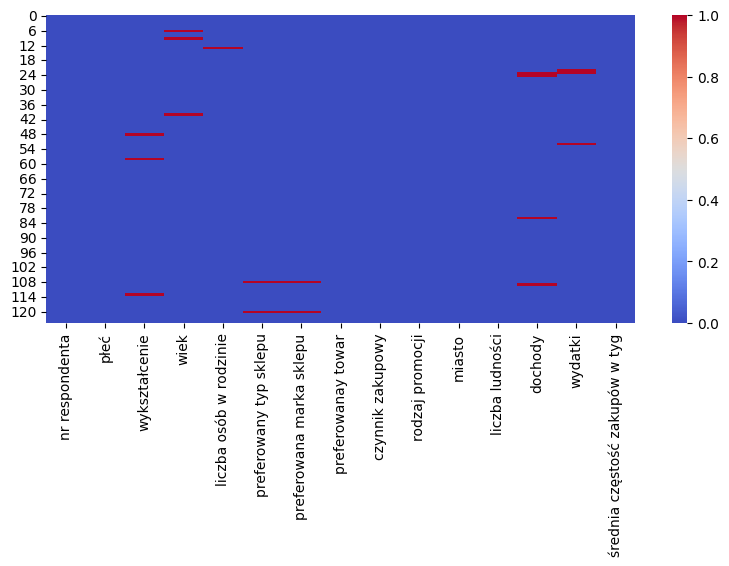

In [946]:
def braki_sprawdzenie(dane):
    """
    Analizuje brakujące dane w tabeli.

    Parametry:
        dane (DataFrame): Ramka danych do analizy.

    Zwraca:
        None
    """
    liczba = dane.isnull().sum().sum()
    proc = (liczba / (dane.shape[0]*dane.shape[1])*100).round(2)
    if liczba == 0:
        print('Analiza brakujących danych:')
        print('='*45)
        print('W tabeli nie stwierdzono brakujących danych!')
    else:
        print('Analiza brakujących danych:')
        print('='*45)
        print(f'Liczba brakujących danych w tabeli: {liczba}')
        print(f'Procent brakujących danych w tabeli: {proc}%')
        print('='*45)
        rows_with_missing_data = dane[dane.isnull().any(axis=1)]
        brakujace_dane = rows_with_missing_data.isnull().sum(axis=0)
        udzial_brakujacych_danych = ((rows_with_missing_data.isnull().sum(axis=0) / dane.shape[0])*100).round(1)
        wyniki = pd.DataFrame({'liczba': brakujace_dane, 'proc': udzial_brakujacych_danych})
        print('Brakujące dane w zmiennych (kolumny):')
        display(wyniki)
        rows_with_missing_data = dane[dane.isnull().any(axis=1)]
        brakujace_dane = rows_with_missing_data.isnull().sum(axis=1)
        udzial_brakujacych_danych = (rows_with_missing_data.isnull().sum(axis=1) / dane.shape[1]*100).round(1)
        wyniki = pd.DataFrame({'liczba': brakujace_dane, 'proc': udzial_brakujacych_danych})
        print('='*45)
        print('Brakujące dane w obserwacjach (wiersze):')
        display(wyniki)
        print('='*45)
        fig, ax = plt.subplots(figsize=(9.5, 4))
        sns.heatmap(dane.isnull(), cmap='coolwarm', ax=ax)
        rows_with_missing_data = dane[dane.isnull().any(axis=1)]
        print('Tabela z brakującymi danymi:')
        display(rows_with_missing_data)

        
braki_sprawdzenie(baza)

#### 3.3.2. Obsługa brakujących danych (*usuwanie [całość, wg progu], imputacja, utworzenie nowej kategorii np. "b.d."*)

    W danych znajdują się barkujące dane.Z uwagi na niewielką ilość pozyskanych danych usuwanie takich danych znacznie zmniejszyło by liczbę dostępych danych, dlatego zostanie dokonana imputacja.  Natomiast w przypadku wierszy  i kolumn , w których znajduje się  = >20 % braków o sustaną usuniete, ponieważ tak znaczna ilość braków może nie być losowa, a imputacja mogła by bardzo zniekształcić oryginalny rozkład 


In [947]:

baza['dochody'].fillna(baza['dochody'].mean().round(1), inplace=True)
baza['wydatki'].fillna(baza['wydatki'].mean().round(1), inplace=True)
baza['wiek'].fillna(baza['wiek'].mode()[0], inplace=True)
baza['liczba osób w rodzinie'].fillna(baza['liczba osób w rodzinie'].mode()[0], inplace=True)
baza['preferowany typ sklepu'].fillna(baza['preferowany typ sklepu'].mode()[0], inplace=True)
baza['preferowana marka sklepu'].fillna(baza['preferowana marka sklepu'].mode()[0], inplace=True)
baza['wykształcenie'].fillna(baza['wykształcenie'].mode()[0], inplace=True)


In [948]:
braki_sprawdzenie(baza)

Analiza brakujących danych:
W tabeli nie stwierdzono brakujących danych!


### **3.4. Obserwacje nietypowe i odstające**

#### 3.4.1. Sprawdzenie czy w zmiennych liczbowych wystepują obserwacje odstające ( naturalne, błędy)

In [949]:
def outliers(df, var):
    data = df[var]
 
    def detect_outliers_iqr(data):
        q1, q3 = np.percentile(data, [25, 75])
        iqr = q3 - q1
        lower_bound = q1 - (1.5 * iqr)
        upper_bound = q3 + (1.5 * iqr)
        outliers_IQR = [i for i, x in enumerate(data) if x < lower_bound or x > upper_bound]
        return outliers_IQR

    def detect_outliers_mean_std(data):
        mean = np.mean(data)
        std = np.std(data)
        lower_bound = mean - (3 * std)
        upper_bound = mean + (3 * std)
        outliers_mean_std = [i for i, x in enumerate(data) if x < lower_bound or x > upper_bound]
        return outliers_mean_std

    def detect_outliers_zscore(data):
        threshold = 2
        z_scores = zscore(data)
        outliers_zscore = [i for i, z in enumerate(z_scores) if abs(z) > threshold]
        return outliers_zscore

    def detect_outliers_winsorizing(data):
        lower_bound, upper_bound = np.percentile(data, [5, 95])
        data = np.clip(data, lower_bound, upper_bound)
        outliers_winsorizing = [i for i, x in enumerate(data) if x < lower_bound or x > upper_bound]
        return outliers_winsorizing

    # Reshape the data to a 2D array
    data = np.array(data).reshape(-1, 1)

    outliers_IQR = detect_outliers_iqr(data)
    outliers_mean_std = detect_outliers_mean_std(data)
    outliers_zscore = detect_outliers_zscore(data)
    outliers_winsorizing = detect_outliers_winsorizing(data)

    df = pd.DataFrame(data)
    df['Odstające_IQR'] = np.where(df.index.isin(outliers_IQR), -1, 1)
    df['Odstające_mean_std'] = np.where(df.index.isin(outliers_mean_std), -1, 1)
    df['Odstające_Zscore'] = np.where(df.index.isin(outliers_zscore), -1, 1)
    df['Odstające_Winsorizing'] = np.where(df.index.isin(outliers_winsorizing), -1, 1)
   
    # Dodatkowa kolumna: Czy_Odstające
    df['Czy_Odstające'] = np.where((df['Odstające_IQR'] == -1) |
                                (df['Odstające_mean_std'] == -1) |
                                (df['Odstające_Zscore'] == -1) |
                                (df['Odstające_Winsorizing'] == -1) , True, False)
    df = df.loc[df['Czy_Odstające'] == True]
    df = df.rename(columns={0: var})  # Zmiana nazwy kolumny 0 na Nazwa_Zmiennej
    
    # Dodaj kolumnę "ile_ident"
    df['ile_ident'] = df[['Odstające_IQR', 'Odstające_mean_std', 'Odstające_Zscore', 'Odstające_Winsorizing']].apply(lambda row: row.value_counts().get(-1, 0), axis=1)
    
    return df


In [950]:
zmienna_liczbowa = ['wiek', 'liczba osób w rodzinie',  'dochody', 'wydatki', 'średnia częstość zakupów w tyg']

for kolumna in zmienna_liczbowa:
    wynik = outliers(baza, kolumna)
    if not wynik.empty:
        print(f' zmienna "{kolumna}" zawiera obserwacje nietypowe :')
        display(wynik)
    else:
        print (f' zmienna "{kolumna}" nie zawiera obserwacji nietypowych')

    

 zmienna "wiek" zawiera obserwacje nietypowe :


,wiek,Odstające_IQR,Odstające_mean_std,Odstające_Zscore,Odstające_Winsorizing,Czy_Odstające,ile_ident
52,158.0,-1,-1,-1,1,True,3


 zmienna "liczba osób w rodzinie" nie zawiera obserwacji nietypowych
 zmienna "dochody" zawiera obserwacje nietypowe :


,dochody,Odstające_IQR,Odstające_mean_std,Odstające_Zscore,Odstające_Winsorizing,Czy_Odstające,ile_ident
22,26000.0,1,1,-1,1,True,1
62,61000.0,1,1,-1,1,True,1
77,61000.0,1,1,-1,1,True,1
83,60000.0,1,1,-1,1,True,1


 zmienna "wydatki" zawiera obserwacje nietypowe :


,wydatki,Odstające_IQR,Odstające_mean_std,Odstające_Zscore,Odstające_Winsorizing,Czy_Odstające,ile_ident
33,4200.0,-1,-1,-1,1,True,3
40,6084.0,1,1,-1,1,True,1
48,5160.0,-1,1,-1,1,True,2
49,4200.0,-1,-1,-1,1,True,3
96,14964.0,1,1,-1,1,True,1
115,14964.0,1,1,-1,1,True,1
120,14964.0,1,1,-1,1,True,1


 zmienna "średnia częstość zakupów w tyg" nie zawiera obserwacji nietypowych


#### 3.4.2. Obsługa obserwacji odstających *(usuwanie, zamiana na NaN, implemetacja estymatorami, dowolną wartością, transformacje)*

Dochody_netto--> Wynika, że są to naturalnie obserwacje,zgodne z wiedzą dziedzinową.
wydatki_na_żywność --> zidentyfikowane dane są zgodne z dziedzina, ale tak skrajne obserwacje mogą zakłucać rozkład, dlatego zamienimy na NaN, następnie dokonać imputacji

In [951]:
 # Numer indeksów, dla których chcemy zmienić wartości na NaN
indexes_to_replace = [33,49]

for index in indexes_to_replace:
    baza.at[index, 'wydatki'] = np.nan



In [952]:
 # Numer indeksów, dla których chcemy zmienić wartości na NaN
indexes_to_replace2= [52]

for index in indexes_to_replace2:
    baza.at[index, 'wiek'] = np.nan


In [953]:
baza['wydatki'].fillna(baza['wydatki'].mean(), inplace=True)
baza['wiek'].fillna(baza['wiek'].mode()[0], inplace=True)
braki_sprawdzenie(baza)

Analiza brakujących danych:
W tabeli nie stwierdzono brakujących danych!


#### 3.4.3. Sprawdzenie czy w zmiennych kategorialnych wystepują obserwacje odstające ( naturalne {obserwacje rzadkie, wysoka kardynalnosć}, błędy)

In [954]:
zmienna_tekstowa= ['płeć', 'wykształcenie',
 'preferowany typ sklepu','preferowana marka sklepu', 'preferowanay towar', 'czynnik zakupowy',
 'rodzaj promocji']

for element in zmienna_tekstowa:
    print(baza[element].value_counts(normalize =True)*100)
    print()



płeć
k    68.0
m    32.0
Name: proportion, dtype: float64

wykształcenie
wyższe        60.0
średnie       20.0
zawodowe      12.8
podstawowe     7.2
Name: proportion, dtype: float64

preferowany typ sklepu
supermarket    30.4
osiedlowy      24.0
bazarek        23.2
galeria        22.4
Name: proportion, dtype: float64

preferowana marka sklepu
Biedronka     26.4
Lidl          16.8
Kaufland      11.2
Netto         11.2
Żabka          9.6
Aldi           8.0
Carrefour      4.8
Dino           4.8
Intermache     1.6
Polomarket     1.6
Społem         1.6
Groszek        0.8
Jeżyk          0.8
Lewiatan       0.8
Name: proportion, dtype: float64

preferowanay towar
produkty piekarnicze    18.4
owoce i warzywa         17.6
mięso i wędliny         16.0
produkty mleczne        15.2
napoje                  14.4
słodycze                 9.6
produkty zbożowe         8.8
Name: proportion, dtype: float64

czynnik zakupowy
jakość                   37.6
cena                     30.4
marka                 

In [955]:

def kat_tab(df,var):
    tabela= pd.DataFrame(df[var].value_counts())
    tabela=tabela.rename_axis(f'poziomy: [{df[var].name}]')
    tabela['częstość %']=(tabela[var]/(tabela[var].sum())*100)
    tabela = tabela.sort_values(by='częstość %', ascending=False)
    return tabela.round(2)



#### 3.4.4. Obsługa obserwacji odstających *(usuwanie, zamiana na NaN, utworzenie nowej kategorii, przypisanie do nowych kategorii zgodnie wiedzą dziedzinową)*

In [956]:
# preferowana marka sklepu  # rzadkie i wysoka kardynalnosć - zredukować liczbę poziomów  utworzyć osobną grupę "inne" z poziomami poniżej 5


dict_preferowana_marka_sklepu ={'Aldi':'Inna_lokalna','Dino':'Inna_lokalna',
'Carrefour':'Inna_lokalna',
'Polomarket':'Inna_lokalna',
'Społem':'Inna_lokalna',
'Intermache':'Inna_lokalna',
'Groszek':'Inna_lokalna',
'Jeżyk':'Inna_lokalna',
'Lewiatan':'Inna_lokalna'}

baza['preferowana marka sklepu'] = baza['preferowana marka sklepu'].replace(dict_preferowana_marka_sklepu)

In [957]:
dict_rodzaj_promocji ={
    'inne':'inne',
    'e-mail ':'inne',
   'sms ':'inne',
    'aplikacja ' :'inne',
    'nan ':'inne',
    'sugestia kasjera':'inne'
}

baza['rodzaj promocji'] = baza['rodzaj promocji'].replace(dict_rodzaj_promocji)

In [958]:

czynnik_dict = {'dostępność':'inne',
 'skład':'inne',
 'lokalność':'inne',
 'opinie':'inne',
 'opakowanie':'inne',
 'preferencje kulinarne':'inne'}

baza['czynnik zakupowy'] = baza['czynnik zakupowy'].replace(czynnik_dict)

In [959]:
zmienna_tekstowa= [
 'preferowany typ sklepu','preferowana marka sklepu', 'preferowanay towar', 'czynnik zakupowy',
 'rodzaj promocji']


for element in zmienna_tekstowa:
    display(baza[element].value_counts(normalize=True)*100)

preferowany typ sklepu
supermarket    30.4
osiedlowy      24.0
bazarek        23.2
galeria        22.4
Name: proportion, dtype: float64

preferowana marka sklepu
Biedronka       26.4
Inna_lokalna    24.8
Lidl            16.8
Kaufland        11.2
Netto           11.2
Żabka            9.6
Name: proportion, dtype: float64

preferowanay towar
produkty piekarnicze    18.4
owoce i warzywa         17.6
mięso i wędliny         16.0
produkty mleczne        15.2
napoje                  14.4
słodycze                 9.6
produkty zbożowe         8.8
Name: proportion, dtype: float64

czynnik zakupowy
jakość    37.6
cena      30.4
marka     16.8
inne      15.2
Name: proportion, dtype: float64

rodzaj promocji
gazetka          36.0
reklama rtv      27.2
nie korzystam    15.2
karta            11.2
inne             10.4
Name: proportion, dtype: float64

# II. Inżynieria i selekcja cech

## 4. Inżynieria cech (*nie jest wymagana)

### **4.1. Transformacje zmiennych numerycznych**

#### 4.1.1. Skalowanie

In [960]:
#'z-score', 'min-max', 'robust'
#transform_numeric_data(dane['dochody_netto'], 'robust')


#### 4.1.2. Normalizowanie

In [961]:
#transform_numeric_data(df, method

#### 4.1.3. Power fun.

In [962]:
#transform_skewed_variables(data, method)

### **4.2. Wzbogacanie danych**

#### 4.2.1. Dyskretyzacja (przekształcenie zmiennych numerycznych do zmiennych kategorialnych)

#### 4.2.2. Kodowanie (przekształcenie zmiennych kategorialnych do zmiennych numerycznych)

In [963]:
#tworzenie nowych zmiennych na podstawie juz istniejących

baza['wiek_kat'] = pd.cut(baza['wiek'], bins=[16,23,40,65,105], labels=['16-22', '23-39', '40-65', '> 66'])

b0 = baza['dochody'].quantile(0)
b1 = baza['dochody'].quantile(0.25)
b2 = baza['dochody'].quantile(0.5)
b3 = baza['dochody'].quantile(0.75)
b4 = baza['dochody'].quantile(1)

c0 = baza['wydatki'].quantile(0)
c1 = baza['wydatki'].quantile(0.25)
c2 = baza['wydatki'].quantile(0.5)
c3 = baza['wydatki'].quantile(0.75)
c4 = baza['wydatki'].quantile(1)


baza['dochody_kat'] = pd.cut(baza['dochody'], bins=[b0,b1,b2,b3,b4], labels=['niski', 'średni', 'wysoki', 'bardzo wysoki'])
baza['wydatki_kat'] = pd.cut(baza['wydatki'], bins=[c0,c1,c2,c3,c4], labels=['niski', 'średni', 'wysoki', 'bardzo wysoki'])
baza['wielkość miasta'] = pd.cut(baza['liczba ludności'], bins=[0,50000,200000,500000, 5000000], labels=['<50 tys.', '51 tys.- 200 tys.','201 tys. - 500 tys.', 'pow 500 tys.'])


In [964]:
zmienna= [
 'wiek_kat',	'dochody_kat',	'wydatki_kat',	'wielkość miasta']


for element in zmienna:
    display(baza[element].value_counts(normalize=True).round(2)*100)

wiek_kat
40-65    43.0
23-39    26.0
> 66     25.0
16-22     7.0
Name: proportion, dtype: float64

dochody_kat
niski            28.0
bardzo wysoki    25.0
wysoki           24.0
średni           23.0
Name: proportion, dtype: float64

wydatki_kat
niski            25.0
średni           25.0
wysoki           25.0
bardzo wysoki    25.0
Name: proportion, dtype: float64

wielkość miasta
51 tys.- 200 tys.      72.0
201 tys. - 500 tys.    19.0
pow 500 tys.            6.0
<50 tys.                3.0
Name: proportion, dtype: float64

#### 4.2.3. Wydobywanie nowych cech z istniejących ( pesel - wiek -płeć, kod pocztowy -miasto-wielkośc miasta, data-rok-mc-.., itp. )

#### 4.2.4. Tworzenie nowych cech na podstawie innych (operacje matematyczne, statystyczne, krzyżowanie cech, itp.)

## 5. Selekcja i wybór cech (*nie jest wymagana)

# III. EDA

## 6. Analiza danych

### **6.1. Analiza danych numerycznych - jednowymiarowa**

#### 6.1.1 Tabele liczebności i częstości

#### 6.1.2 Podstawowe parametry statystyczne

In [965]:
def stat(df):
    suma = df.sum()
    liczba = df.count()
    braki = df.isna().sum()
    min = df.min()
    max  = df.max()
    średnia = df.mean().round(2)
    rozstęp = (df.max()-df.min()).round(2)
    Q_10 = df.quantile(.1).round(2)
    Q1_25 = df.quantile(.25).round(2)
    Q2_50 =  df.quantile(.5).round(2)
    Q3_75 = df.quantile(.75).round(2)
    Q_90 = df.quantile(.9).round(2)
    IQR = df.quantile(.75) - df.quantile(.25).round(2)
    odch_cwiar =  ((Q3_75  - Q1_25)/2).round(2)
    odchylenie_przeciętne = (np.mean(np.abs(df - df.mean()))/df.mean()*100).round(2)
    wariancja =  df.var(ddof=1).round(3)
    odch_std = df.std(ddof=1).round(3)
    błąd_odch_std =  df.std(ddof=1)/np.sqrt(df.count()).round(3)
    kl_wsp_zmien = df.std(ddof=1)/df.mean().round(2)
    poz_wsp_zmien =  ((df.quantile(.75) - df.quantile(.25))/df.quantile(.5)).round(2)
    skośność = df.skew().round(2)
    kurtoza =  df.kurtosis().round(2)

    wyniki = pd.DataFrame({'liczba':liczba,'liczba brakujących':braki,'suma': suma,'min':min, 'max':max,
                            'średnia': średnia,'rozstęp':  rozstęp,'Q_10%': Q_10 ,'Q1_25%': Q1_25 ,'Q2_50%':   Q2_50 ,'Q3_75%':  Q3_75 ,'Q_90%':   Q_90,'IQR': IQR ,
                            'odch_cwiar': odch_cwiar,'odchylenie przeciętne': odchylenie_przeciętne, 'wariancja':  wariancja,'odch_std': odch_std, 'błąd_odch_std':  błąd_odch_std,
                            'kl_wsp_zmien':  kl_wsp_zmien, 'poz_wsp_zmien':  poz_wsp_zmien, 'skośność':  skośność, 'kurtoza': kurtoza
                           })

   
    return wyniki.T.round(2)

In [966]:
stat(baza[['dochody','wydatki']])

,dochody,wydatki
liczba,125.00,125.00
liczba brakujących,0.00,0.00
suma,5400826.40,1294229.88
min,26000.00,5160.00
max,61000.00,14964.00
średnia,43206.61,10353.84
rozstęp,35000.00,9804.00
Q_10%,33400.00,8090.40
Q1_25%,38000.00,9060.00
Q2_50%,43000.00,10255.40


In [967]:
def plot_num(dane):
    plt.figure(figsize=(12, 3))
    plt.rcParams['axes.facecolor'] = 'white'
    plt.suptitle(f'Rozkład zmiennej ilościowej:  {dane.name}', fontsize=11, color='black')
    plt.subplot(1, 3, 1)
    ax1 = dane.plot(kind='hist', bins=8,edgecolor='blue', linewidth=0.8, color='white')
    counts, bins, patches = plt.hist(dane, bins=8,edgecolor='blue', linewidth=0.8, color='white')
    ax1.tick_params(axis='both', which='both', labelsize=8)
    ax1.set_title('Histogram', color='blue', size=10)
    ax1.set_xlabel(dane.name, fontsize=8)
    ax1.set_ylabel('Liczebność', fontsize=8)
    ax1.spines['right'].set_visible(False)
    ax1.spines['top'].set_visible(False)
    for count, bin_value, patch in zip(counts, bins, patches):
        plt.annotate(str(int(count)), xy=(bin_value, count), xytext=(10, 1),textcoords='offset points', ha='center', va='bottom',fontsize=8, color='black')

    plt.subplot(1, 3, 2)
    ax2 = dane.plot(kind='box')
    ax2.tick_params(axis='both', which='both', labelsize=8)
    ax2.set_title('Boxplot', color='blue', size=10)
    ax2.spines['right'].set_visible(False)
    ax2.spines['top'].set_visible(False)
        # Dodanie adnotacji z oznaczeniem średniej
    mean_value = dane.mean()

    plt.axhline(mean_value, color='blue', linestyle='--', linewidth=0.5)
    plt.annotate(f'Mean: {mean_value:.2f}', xy=(1.2, mean_value), xytext=(20, -5), textcoords='offset points', ha='center', va='center', fontsize=6, color='black')

    plt.subplot(1, 3, 3)
    ax3 = dane.plot(kind='kde')
    ax3.tick_params(axis='both', which='both', labelsize=8)
    ax3.set_title('KDE', color='blue', size=10)
    ax3.set_xlabel(dane.name, fontsize=8)
    ax3.set_ylabel('Gęstość', fontsize=8)
    ax3.spines['right'].set_visible(False)
    ax3.spines['top'].set_visible(False)

    ax2.grid(axis='y', linestyle='--', color='lightgray')

    plt.tight_layout()
    plt.show()


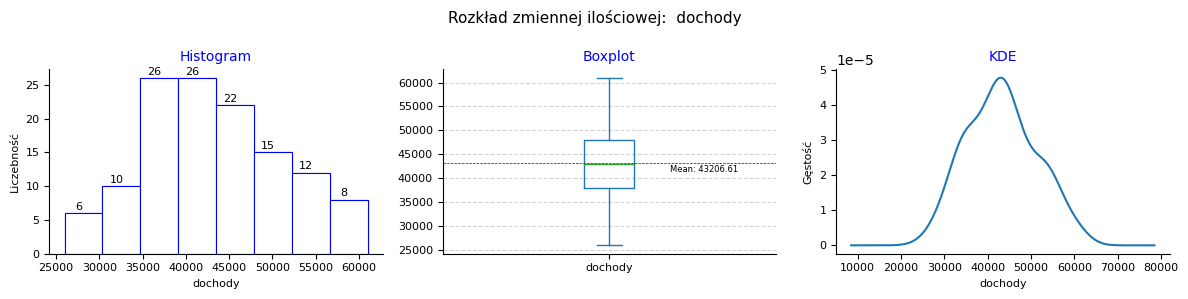

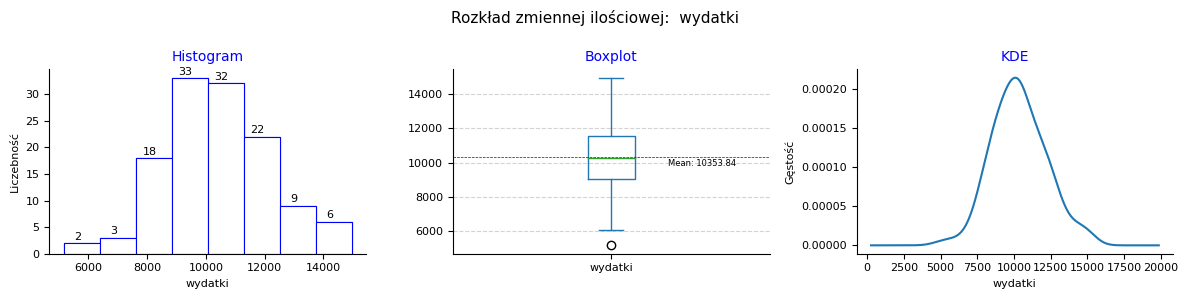

In [968]:

plot_num(baza['dochody'])
plot_num(baza['wydatki'])

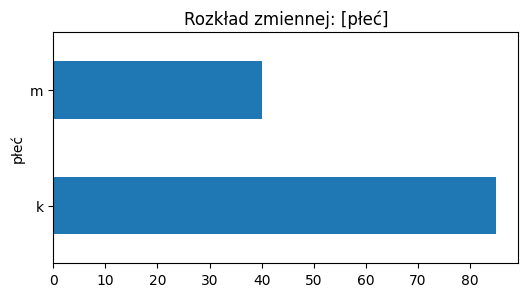

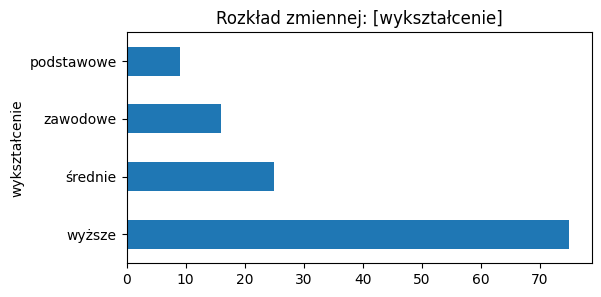

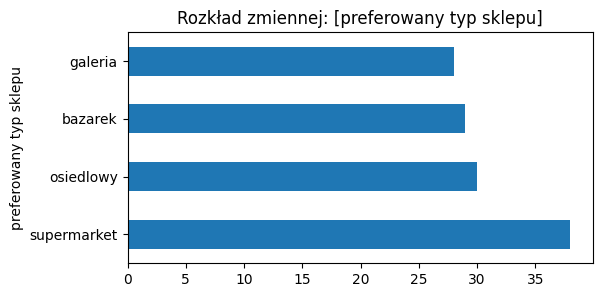

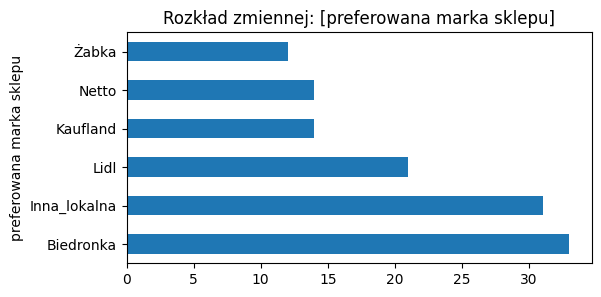

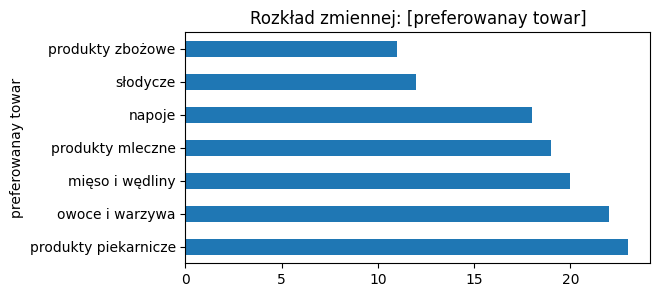

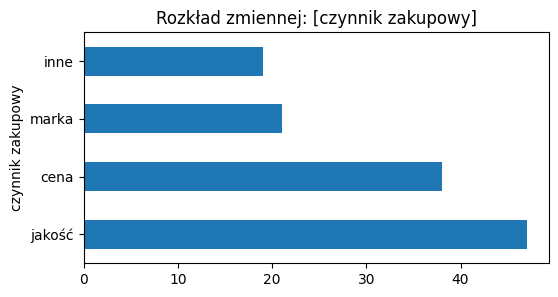

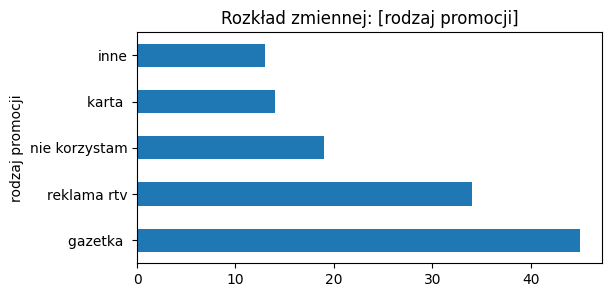

In [980]:
zmienna_tekstowa= ['płeć', 'wykształcenie',
 'preferowany typ sklepu','preferowana marka sklepu', 'preferowanay towar', 'czynnik zakupowy',
 'rodzaj promocji']

    
for element in zmienna_tekstowa:
    plt.figure(figsize=(6, 3))
    baza[element].value_counts().plot(kind = 'barh', title=f'Rozkład zmiennej: [{element}]')

TypeError: The x variable is categorical, but one of ['numeric', 'datetime'] is required

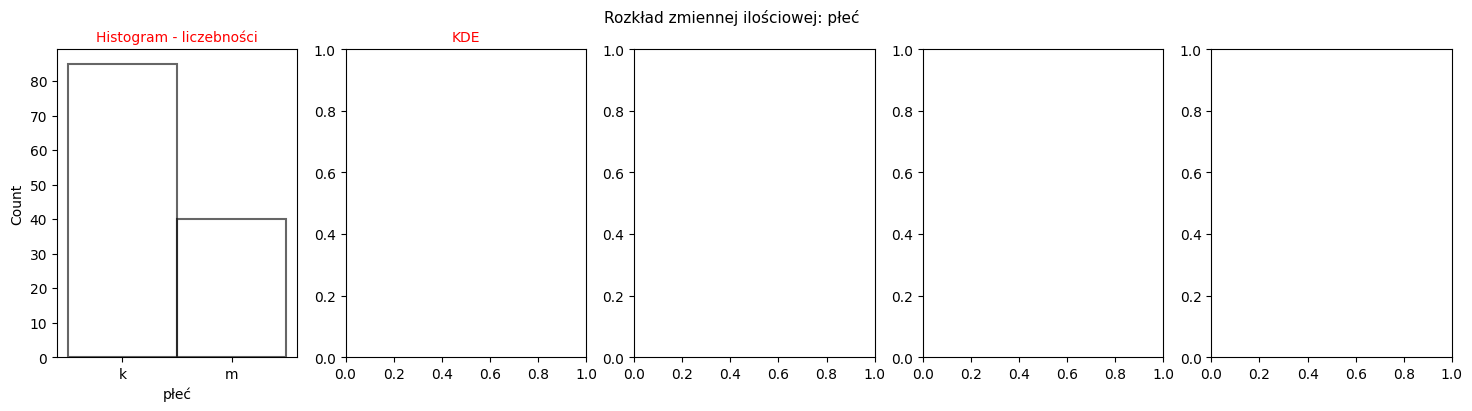

In [970]:
plot_num2(baza, 'płeć')

In [ ]:

def plot_cat22(df, var):
    fig, axes = plt.subplots(1, 2, figsize=(9, 3))
    plt.suptitle(f'Rozkład zmiennej kategorialnej: {var}', fontsize=9, color='black')
    axes[0].set_title("Liczebności", color='red', fontsize=8)
    sns.countplot(df, x=var,fill="False", ax=axes[0])
    axes[1].set_title("Częstości %", color='red', fontsize=9)
    sns.histplot(df, x=var, stat='percent',ax=axes[1])
    axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, fontsize=8)
    axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, fontsize=8)
    axes[0].tick_params(axis='both', which='major', labelsize=8)
    axes[1].tick_params(axis='both', which='major', labelsize=8)
    for ax in axes:
        ax.grid(axis='y', linestyle='--', color='lightgray')
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.xaxis.label.set_visible(False)
        ax.yaxis.label.set_size(8)
        for rect in ax.patches:
            height = rect.get_height()
            ax.annotate(f'{height:.2f}', xy=(rect.get_x() + rect.get_width() / 2, height), xytext=(0, 3),
                        textcoords="offset points", ha='center', va='bottom', fontsize=7)

    plt.tight_layout()
    plt.show()


#### 6.1.3 Wykresy

#### 6.1.4 Ocena zgodnosci z rozkladem normalnym

In [ ]:
testy_normalnosci(baza['dochody'])

In [ ]:
testy_normalnosci(baza['wydatki żywnościowe'])

In [ ]:
baza.columns

### **6.2. Analiza danych kategorialnych - jednowymiarowa**

#### 6.2.1 Tabele liczebności i częstości

#### 6.2.2 Wykresy

### **6.3. Analiza danych numerycznych - analiza porównawcza wg poziomów zmiennej kategorialnej**

#### 6.3.1. Podstawowe statystyki

In [ ]:
lista1 = ['wydatki żywnościowe']
lista2 = lista = ['płeć', 'wykształcenie', 'typ sklepu', 'czynnik zakupowy', 'marka sklepu', 'towar', 'rodzaj promocji']

for element1 in lista1:
    for element2 in lista2:
        result = suma(baza, element1, element2)
        title = f"Statystyki: [{element1} - {element2}]"
        display(title, result)



#### 6.3.2. Wykresy

In [ ]:
lista1 = ['wydatki żywnościowe']
lista2 = ['płeć', 'wykształcenie', 'typ sklepu', 'czynnik zakupowy', 'marka sklepu', 'rodzaj promocji', 'towar']

for element1 in lista1:
    for element2 in lista2:
        result = suma(baza, element1, element2)
        title = f"Statystyki: [{element1} - {element2}]"
        display(title)
        plot_num2(baza, element1, element2)

#### 6.3.1. Testownie różnic (testy t, anova)

### **6.4. Analiza zależnosci zmiennych numerycznych**

#### 6.4.1. Tablica korelacji

In [ ]:
lista1 = ['dochody', 'wydatki']
lista2 = ['płeć', 'wykształcenie', 'typ sklepu', 'czynnik zakupowy', 'marka sklepu', 'towar', 'rodzaj promocji']

korelacje_num(baza, 'pearson','dochody', 'wydatki')

#### 6.4.2. Wykres korelacji i rozrzutu

In [ ]:
num_plot2(baza, 'dochód', 'wydatki żywnościowe')

###  **6.5. Analiza zależności zmiennych numerycznych wg poziomów zmienej kategorialnej**

#### 6.5.1. Tablica korelacji

In [ ]:

lista1 = ['dochody_netto', 'wydatki_na_żywność']
lista2 = ['płeć', 'wykształcenie', 'preferowany typ sklepu', 'czynniki zakupowe', 'preferowana marka sklepu', 'preferowana marka spożywcza','preferowany rodzaj promocji']


for element2 in lista2:
    title = f"Statystyki: [{element1} - {element2}]"
    print(title)
    korelacje_num_nom(dane, 'pearson', element2, 'dochody_netto', 'wydatki_na_żywność')

#### 6.5.2. Wykres korelacji i rozrzutu

In [ ]:
lista1 = ['dochody_netto', 'wydatki_na_żywność']
lista2 = ['płeć', 'wykształcenie', 'preferowany typ sklepu', 'czynniki zakupowe', 'preferowana marka sklepu', 'preferowana marka spożywcza','preferowany rodzaj promocji']

for element1 in lista1:
    for element2 in lista2:
        title = f"Statystyki: [{element1} - {element2}]"
        #display(title)
        g = sns.FacetGrid(data=dane, col=element2)
        g = g.map(plt.scatter, "dochody_netto", 'wydatki_na_żywność', edgecolor="w")
        g.add_legend()

        g = sns.FacetGrid(data=dane, col=element2, hue='płeć')
        g = g.map(plt.scatter, "dochody_netto", 'wydatki_na_żywność', edgecolor="w")
        g.add_legend() 



# wykres rozrzutu 2 zmienne liczbowe i 2 kategoryczne



###  **6.6 Analiza zależnosci zmiennych kategorialnych**

####  6.6.1 Tabele kontyngencji

In [ ]:
from itertools import combinations

from itertools import combinations

lista1 = ['płeć', 'wykształcenie', 'preferowany typ sklepu', 'czynniki zakupowe', 'preferowana marka sklepu', 'preferowana marka spożywcza','preferowany rodzaj promocji']
lista2 = ['płeć', 'wykształcenie', 'preferowany typ sklepu', 'czynniki zakupowe', 'preferowana marka sklepu', 'preferowana marka spożywcza','preferowany rodzaj promocji']

for element1, element2 in combinations(lista1, 2):
    title = f"Statystyki: [{element1} - {element2}]"
    result = rozklady_nom(dane, element1, element2)

    print(title)
    display(result)




In [ ]:
def rozklady_nom(df, *cat, metoda):
    t1 = pd.crosstab(df[cat[0]], columns=[df[col] for col in cat[1:]], dropna=False, margins=True, margins_name='suma')
    t2 = (pd.crosstab(df[cat[0]], columns=[df[col] for col in cat[1:]], dropna=False, normalize='all', margins=True, margins_name='suma')*100).round(2)
    t3=((pd.crosstab(df[cat[0]], columns=[df[col] for col in cat[1:]], dropna=False, normalize='columns'))*100).round(2)
    t3.loc['suma'] = t3.sum()
    t3.loc['suma'] = t3.loc['suma'].apply(lambda x: "{:.0f}".format(x))
    t4=(pd.crosstab(df[cat[0]], columns=[df[col] for col in cat[1:]], dropna=False, normalize='index', margins_name='suma')*100).round(2)
    t4['suma'] = t4.sum(axis=1)
    t4['suma'] = t4['suma'].apply(lambda x: "{:.0f}".format(x))
    print(  'liczebności:  ')    
    display(t1.round(2))
    print('częstości całkowite %:') 
    display(t2.round(2))
    print('częstości wg kolumn %: ')  
    display(np.round(t3,2))
    print('częstosci wg wierszy %:')
    display(np.round(t4,2))


    


####  6.6.2 Wykresy

In [ ]:
from itertools import combinations

lista1 = ['płeć', 'wykształcenie', 'preferowany typ sklepu', 'czynniki zakupowe', 'preferowana marka sklepu', 'preferowana marka spożywcza','preferowany rodzaj promocji']
lista2 = ['płeć', 'wykształcenie', 'preferowany typ sklepu', 'czynniki zakupowe', 'preferowana marka sklepu', 'preferowana marka spożywcza','preferowany rodzaj promocji']

for element1, element2 in combinations(lista1, 2):
    title = f"Statystyki: [{element1} - {element2}]"
    print(title)
    plot_num3(dane, x_cat=element1, y_cat= element2)

####  6.6.3 Miary zależności

In [ ]:
#korelacje_nom(dane, 'płeć', 'wykształcenie', 'cp')

In [ ]:
import numpy as np
from scipy import stats
from statsmodels.stats.proportion import proportion_confint, proportions_ztest

def perform_analysis(data1, data2=None, method='mean', ci_method='z', hypothesis_method='t', confidence_level=0.95, null_value=0):
    if method == 'mean':
        if data2 is None:
            if ci_method == 'z':
                confidence_interval = stats.norm.interval(confidence_level, loc=np.mean(data1), scale=stats.sem(data1))
            elif ci_method == 't':
                confidence_interval = stats.t.interval(confidence_level, len(data1)-1, loc=np.mean(data1), scale=stats.sem(data1))
            else:
                raise ValueError("Invalid CI method selected.")
                
            if hypothesis_method == 't':
                t_statistic, p_value = stats.ttest_1samp(data1, null_value)
            else:
                raise ValueError("Invalid hypothesis testing method selected.")
                
            return confidence_interval, t_statistic, p_value
            
        else:
            if ci_method == 'z':
                confidence_interval = stats.norm.interval(confidence_level, loc=np.mean(data1)-np.mean(data2), scale=np.sqrt(np.var(data1)/len(data1) + np.var(data2)/len(data2)))
            elif ci_method == 't':
                confidence_interval = stats.t.interval(confidence_level, len(data1)+len(data2)-2, loc=np.mean(data1)-np.mean(data2), scale=np.sqrt(np.var(data1)/len(data1) + np.var(data2)/len(data2)))
            else:
                raise ValueError("Invalid CI method selected.")
            
            if hypothesis_method == 't':
                t_statistic, p_value = stats.ttest_ind(data1, data2)
            elif hypothesis_method == 'z':
                z_statistic, p_value = proportions_ztest([sum(data1), sum(data2)], [len(data1), len(data2)], null_value)
            else:
                raise ValueError("Invalid hypothesis testing method selected.")
                
            return confidence_interval, t_statistic, p_value
            
    elif method == 'proportion':
        if data2 is None:
            count1 = sum(data1)
            n1 = len(data1)
            confidence_interval = proportion_confint(count1, n1, alpha=1-confidence_level, method=ci_method)
            
            if hypothesis_method == 'z':
                z_statistic, p_value = proportions_ztest([count1], [n1], null_value, prop_var=ci_method)
            else:
                raise ValueError("Invalid hypothesis testing method selected.")
                
            return confidence_interval, z_statistic, p_value
        
        else:
            count1 = sum(data1)
            count2 = sum(data2)
            n1 = len(data1)
            n2 = len(data2)
            confidence_interval1 = proportion_confint(count1, n1, alpha=1-confidence_level, method=ci_method)
            confidence_interval2 = proportion_confint(count2, n2, alpha=1-confidence_level, method=ci_method)
            
            if hypothesis_method == 'z':
                z_statistic, p_value = proportions_ztest([count1, count2], [n1, n2], prop_var=ci_method)
            else:
                raise ValueError("Invalid hypothesis testing method selected.")
                
            return confidence_interval1, confidence_interval2, z_statistic, p_value
            
    else:
        raise ValueError("Invalid analysis method selected.")



In [ ]:
# Example 1: Mean Analysis (One-sample)
data1 = np.array([1, 2, 3, 4, 5])
confidence_interval, t_statistic, p_value = perform_analysis(data1, method='mean', ci_method='t', hypothesis_method='t', confidence_level=0.95, null_value=0)
print("Confidence Interval:", confidence_interval)
print("T-statistic:", t_statistic)
print("P-value:", p_value)

# Example 2: Mean Analysis (Two-sample)
data1 = np.array([1, 2, 3, 4, 5])
data2 = np.array([6, 7, 8, 9, 10])
confidence_interval, t_statistic, p_value = perform_analysis(data1, data2, method='mean', ci_method='t', hypothesis_method='t', confidence_level=0.95, null_value=0)
print("Confidence Interval:", confidence_interval)
print("T-statistic:", t_statistic)
print("P-value:", p_value)

# Example 3: Proportion Analysis (One-sample)
data1 = np.array([0, 1, 1, 1, 0])
confidence_interval, z_statistic, p_value = perform_analysis(data1, method='proportion', ci_method='normal', hypothesis_method='z', confidence_level=0.95, null_value=0.5)
print("Confidence Interval:", confidence_interval)
print("Z-statistic:", z_statistic)
print("P-value:", p_value)


# Example 4: Proportion Analysis (Two-sample)
data1 = np.array([0, 1, 1, 1, 0])
data2 = np.array([1, 1, 1, 0, 0])
confidence_interval1, confidence_interval2, z_statistic, p_value = perform_analysis(data1, data2, method='proportion', ci_method='normal', hypothesis_method='z', confidence_level=0.95, null_value=0)
print("Confidence Interval for Data 1:", confidence_interval1)
print("Confidence Interval for Data 2:", confidence_interval2)
print("Z-statistic:", z_statistic)
print("P-value:", p_value)


In [ ]:
import pandas as pd
import re
import string

import pandas as pd

# Tworzenie przykładowego DataFrame z kolumną "Kolumna"
data = {'Kolumna': ['5', 'Suwałki', '_', '.', 'Warsza<wa', 'Olsz}tyn', ' Świ%dnica ', 'Tor$uń5',' ', 'Włocł>awek', 'Wielkopolski_','OPOLE']}
df = pd.DataFrame(data)

#[0-9]|\s|_|/.|,|\.|\?|:|;|>|<|\+|=|{|}|-|<|>| !"#$%&'()*+,-./:;<=>?@[\]^_{|}~

czy_inne_znaki = df['Kolumna'].str.contains('^[A-Z]+$|\W|_|\d')
print(f' zawiera inne znaki nie alfanumeryczne:{any(czy_inne_znaki)}')
print(f'liczba niezgodnosci:{sum(czy_inne_znaki)}')
display(df[czy_inne_znaki])

wyszukiwane_znaki = re.findall('^[A-Z]+$|\W|_|\d', ' '.join(df['Kolumna']))

print("Znalezione znaki:")
print(wyszukiwane_znaki)

def usun_znaki(text):
    for znak in wyszukiwane_znaki:
        text = re.sub(re.escape(znak), '', text)
    return text

# Zastosowanie funkcji usun_znaki() dla każdego elementu w kolumnie "Kolumna"
df['Kolumna'] = df['Kolumna'].apply(usun_znaki).str.title()

# Wyświetlenie zmodyfikowanego DataFrame
display(df)

czy_inne_znaki = df['Kolumna'].str.contains('^[A-Z]+$|\W|_|\d')
print(f' zawiera inne znaki nie alfanumeryczne:{any(czy_inne_znaki)}')
print(f'liczba niezgodnosci:{sum(czy_inne_znaki)}')
display(df[czy_inne_znaki])

In [ ]:
import re

zdanie1 = "wydatki kształtują się w przedziale od 250 zł do 550 zł"
zdanie2 = "wydatki kształtują się w przedziale od 450 zł do 850 zł"
zdanie3 = "wydatki kształtują się w przedziale od 150 zł do 650 zł"
zdanie4 = "wydatki kształtują się w przedziale od 250 zł do 850 zł"
wyrazenie_regularne = r"\b\d+\b"

zdania = [zdanie1, zdanie2, zdanie3, zdanie4]

for zdanie in zdania:
    liczby = re.findall(wyrazenie_regularne, zdanie)
    print(liczby)


In [ ]:
import pandas as pd

data = {
    'zdanie': ['250.45 zl-550PLN',
               'od 450.45 do  850.664',
               '1450.44-650',
               '250.45zł-850.45 zł']
}

df1 = pd.DataFrame(data)

# Podzielenie wartości liczbowych z częścią dziesiętną na dwie kolumny
df1[['od', 'do']] = df1['zdanie'].str.extract(r'(\d+\.\d+|\d+)[^\d]*(\d+\.\d+|\d+)')


df1['średnia'] = (df1['od'].astype(float) + df1['do'].astype(float)) / 2

df1




In [ ]:
import pandas as pd

data = {
    'zdanie': ['250.45 zl-550PLN',
               'od 450.45 do  850.664',
               '1450.44-650',
               '250.45zł-850.45 zł']
}

df1 = pd.DataFrame(data)

# Podzielenie wartości liczbowych z częścią dziesiętną na dwie kolumny
df1[['od', 'do']] = df1['zdanie'].str.extract(r'(\d+\.\d+|\d+)[^\d]*(\d+\.\d+|\d+)')


df1['średnia'] = (df1['od'].astype(float) + df1['do'].astype(float)) / 2

print(df1)
